In [26]:
import csv

def guardar_datos_variacion(t, dot_M_b, dot_M_ac, dot_M_rh, archivo):
    datos_var = archivo + '_variacion_masa.csv'
    archivo_existe = False
    try:
        with open(datos_var, 'r') as archivo_csv:
            archivo_existe = True
    except FileNotFoundError: 
        archivo_existe = False
        
    modo_apertura = 'a' if archivo_existe else 'w'
    with open(datos_var, mode=modo_apertura, newline='') as archivo_csv:
        writer = csv.writer(archivo_csv)
        if not archivo_existe:
            writer.writerow(['tiempo', 'dot_M_b', 'dot_M_ac', 'dot_M_rh'])
        writer.writerow([t, dot_M_b, dot_M_ac, dot_M_rh])

In [56]:
from astropy import constants as ast
from astropy import units as u

m_sol = ast.M_sun.cgs   # masa del sol en gramos
G = ast.G.cgs           #constante de gravitacion universal en cgs
c = ast.c.cgs           #velocidad de la luz en cgs



In [57]:
from scipy import constants as sci
from scipy.constants import physical_constants

#cargamos las constantes que vayamos a usar en el calculo
t_planck = physical_constants["Planck time"][0]
pi = sci.pi

masa_planck = physical_constants["Planck mass"][0]
m_planck = masa_planck*(10**3)*u.g #masa de planck en gramos
m_planck

<Quantity 2.176434e-05 g>

In [58]:
#definimos nuestras constantes 
#m_0 = m_sol*10**4              # la masa en el momento en que se produce el bounce
x_b = 9*10**37                 # constante adimensional que me define a a_b con x_b < 10^38 
a_b = 1/x_b                     # constante del bounce
T_b = t_planck*10**25          # 10^3 < T_b / t_planck < 10^40 [s]    asi que elijo uno intermedio
A_M = (5.3*10**25)*u.g**3        # en unidades de g^3 s^-1
#M = m_sol*10**8                 # masa inicial del bh en g
#A = 1                         # sabemos que A>0, pero en principio lo anoto de esta manera para tenerlo
lamb = 1.1056*10**(-56)        # constante cosmologica en cm^-2 
rho_0 = (lamb*c**2)/(8*pi*G)*u.cm**(-2)   # densidad de "hoy" en cgs. consideramos la densidad de vacio, que es la que domina

In [30]:
import matplotlib.pyplot as plt 
import numpy as np

masas = (10**(-13)*m_sol, m_sol*10**(-5), m_sol*10**6) #masas en g
#los limites los saque de la tesis de edu, el resto elegi yo

for i in range(len(masas)): 
    for j in range(len(masas)):
        tiempo = np.logspace(-25, 6, 1000, endpoint=False) 
        M = masas[i]
        m_0 = masas[j]
        nombre = str(i)+str(j)
        
        if M >= m_0:
            for t in tiempo:
                if t < -T_b or t > T_b: 
                    w = 1/3  #radiacion 
                    aux = 1+3*w*c.value**2
                    A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)
                    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
                    P = w*(c**2)*rho
        
                    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
                    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P) 
                    if M > 10**17*u.g:
                        A_M = (5.3*10**25)*u.g**3        # en unidades de g^3 s^-1
                        dot_M_rh = - A_M / M**2
                    else: 
                        A_M = (7.8*10**26)*u.g**3        # en unidades de g^3 s^-1
                        dot_M_rh = - A_M / M**2
                else:
                    w = 1/3   
                    aux = 1+3*w*c.value**2
                    A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)
                    rho = rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w))  
                    P = w*(c**2)*rho                             
        
                    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 
                    dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*rho-P) 
                    if M > 10**17*u.g:
                        A_M = (5.3*10**25)*u.g**3        # en unidades de g^3 s^-1
                        dot_M_rh = - A_M / M**2
                    else: 
                        A_M = (7.8*10**26)*u.g**3        # en unidades de g^3 s^-1
                        dot_M_rh = - A_M / M**2
        
            
                datos = guardar_datos_variacion(t, dot_M_b.value, dot_M_ac.value, dot_M_rh.value, nombre)
    
    

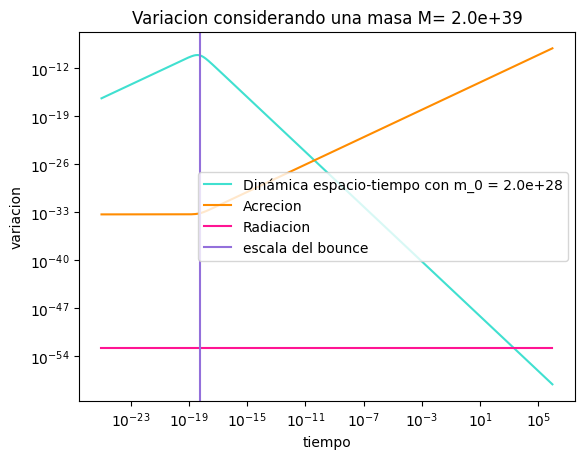

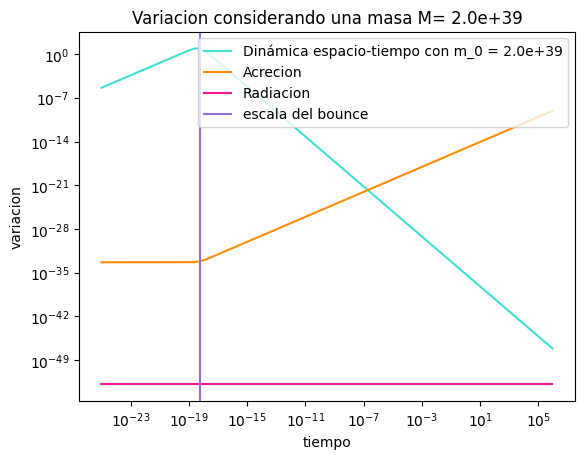

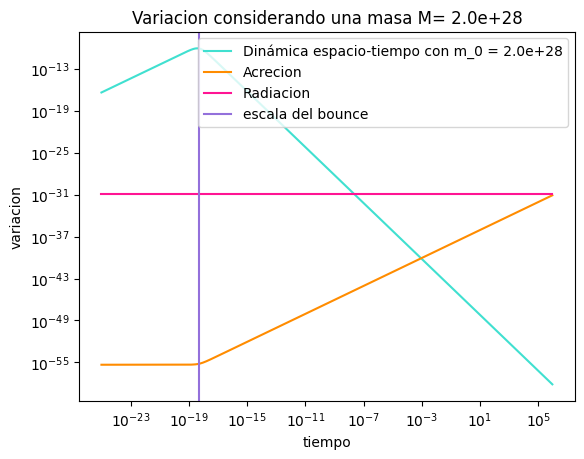

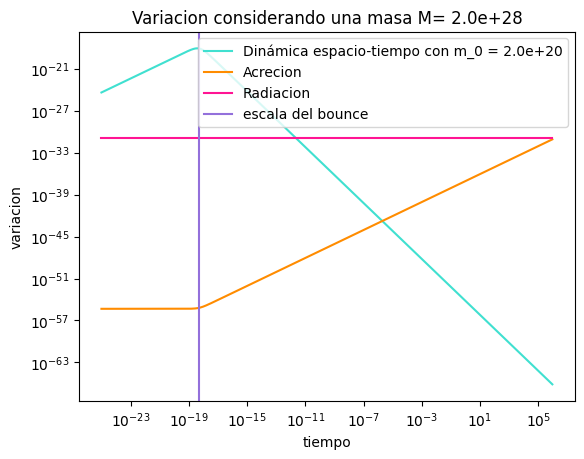

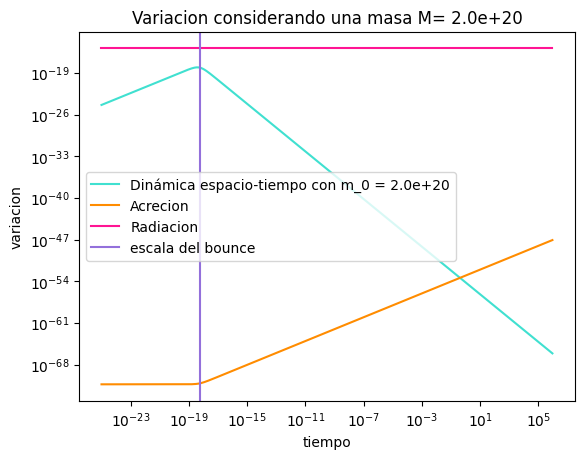

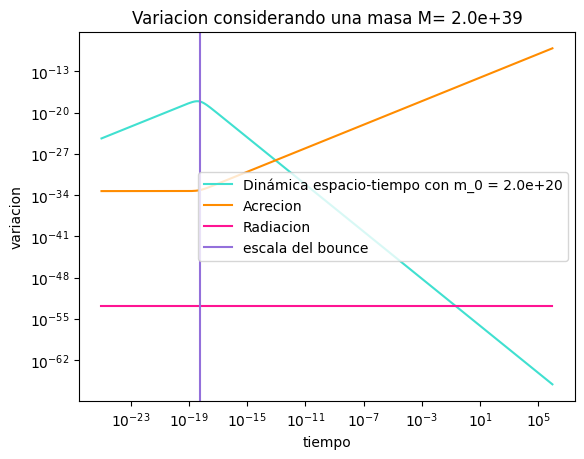

In [32]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np


masas = (10**(-13)*m_sol, m_sol*10**(-5), m_sol*10**6)

ruta = "/home/iara/faq/tesis"
archivos = os.listdir(ruta)

datos_csv = [archivo for archivo in archivos if archivo.endswith('.csv')]

for archivo in datos_csv: 
    datos = pd.read_csv(archivo)

    i = int(archivo[0])
    j = int(archivo[1])

    M = masas[i]
    m_0 = masas[j]
    
    t = datos['tiempo']
    dot_M_b = datos['dot_M_b']
    dot_M_ac = datos['dot_M_ac']
    dot_M_rh = -datos['dot_M_rh'] #el menos va porque si no no me deja pasarlo a escala log porque es negativo
    
    plt.xlabel('tiempo')
    plt.ylabel('variacion')
    plt.yscale('log')  
    plt.xscale('log') 
 
    plt.plot(t, dot_M_b, label = "Dinámica espacio-tiempo con m_0 = {:.1e}".format(m_0.value), color = 'turquoise')
    plt.plot(t, dot_M_ac, label = "Acrecion", color='darkorange')
    plt.plot(t, dot_M_rh , label = "Radiacion", color = 'deeppink')
    plt.axvline(x = T_b, color = 'mediumpurple', label = 'escala del bounce')
    plt.legend()
    plt.title('Variacion considerando una masa M= {:.1e}'.format(M.value))
    plt.show()

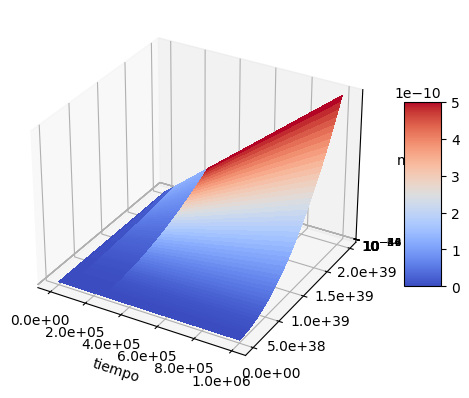

In [60]:
#aca vamos a intentar hacer el mapa 3d 

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#cuentas auxiliares
w = 1/3  #radiacion 
aux = 1+3*w*c.value**2
A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)


#datos 
t = np.logspace(-25, 6, 1000) 
M = np.linspace(10**(-13)*m_sol.value, (10**6)*m_sol.value, 1000)
t, M = np.meshgrid(t, M)
dot_M_ac = 4*pi*A*G**2*c**(-5)*M**2*(c**2*(rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w)))-w*(c**2)*rho_0*a_b*(1+(t/T_b)**2)**(1/(3-3*w)))

#ploteamos
surf = ax.plot_surface(t, M, dot_M_ac, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(10**(-50), 10**50)
#ax.zaxis.set_major_locator(LinearLocator(10))

# A StrMethodFormatter is used automatically
ax.xaxis.set_major_formatter('{:.1e}'.format)
ax.yaxis.set_major_formatter('{:.1e}'.format)
ax.zaxis.set_major_formatter('{:.1e}'.format)

#arreglamos
ax.set_xlabel('tiempo')
ax.set_zlabel('masa')
#ax.set_zlabel('Variación por acreción')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_zscale('log')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()


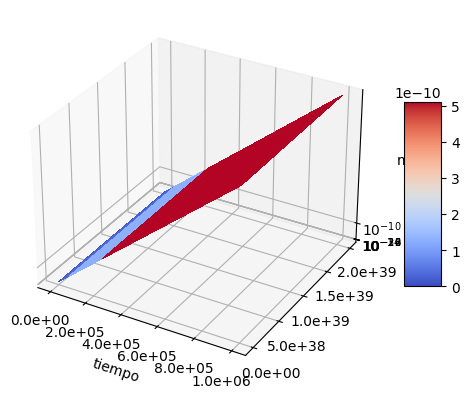

In [65]:
#aca vamos a intentar hacer el mapa 3d 

from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#cuentas auxiliares
w = 1/3  #radiacion 
aux = 1+3*w*c.value**2
A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)

masas = (10**(-13)*m_sol.value, m_sol.value*10**(-5), m_sol.value*10**6)

for m_0 in masas:

    #datos 
    t = np.logspace(-25, 6, 1000) 
    M = np.linspace(m_0, (10**6)*m_sol.value, 1000)
    t, M = np.meshgrid(t, M)
    dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 


    #ploteamos
    surf = ax.plot_surface(t, M, dot_M_ac, cmap=cm.coolwarm, linewidth=0, antialiased=False)

    # Customize the z axis.
    #ax.set_zlim(10**(-50), 10**50)
    #ax.zaxis.set_major_locator(LinearLocator(10))

    # A StrMethodFormatter is used automatically
    ax.xaxis.set_major_formatter('{:.1e}'.format)
    ax.yaxis.set_major_formatter('{:.1e}'.format)
    ax.zaxis.set_major_formatter('{:.1e}'.format)

    #arreglamos
    ax.set_xlabel('tiempo')
    ax.set_zlabel('masa')
    #ax.set_zlabel('Variación por acreción')
    #ax.set_xscale('log')
    #ax.set_yscale('log')
    ax.set_zscale('log')

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

In [69]:
10**(-13)*m_sol.value

1.988409870698051e+20

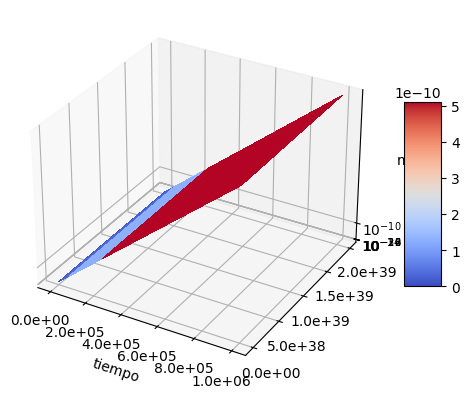

In [70]:
from matplotlib import cm
from matplotlib.ticker import LinearLocator

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

A_M = (5.3*10**25)        # en unidades de g^3 s^-1

#datos 
t = np.logspace(-25, 6, 1000) 
M = np.linspace(10**(-13)*m_sol.value, (10**6)*m_sol.value, 1000)
t, M = np.meshgrid(t, M)
dot_M_rh = - A_M / M**2

#ploteamos
surf = ax.plot_surface(t, M, dot_M_ac, cmap=cm.coolwarm, linewidth=0, antialiased=False)

# Customize the z axis.
#ax.set_zlim(10**(-50), 10**50)
#ax.zaxis.set_major_locator(LinearLocator(10))

# A StrMethodFormatter is used automatically
ax.xaxis.set_major_formatter('{:.1e}'.format)
ax.yaxis.set_major_formatter('{:.1e}'.format)
ax.zaxis.set_major_formatter('{:.1e}'.format)

#arreglamos
ax.set_xlabel('tiempo')
ax.set_zlabel('masa')
#ax.set_zlabel('Variación por acreción')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_zscale('log')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

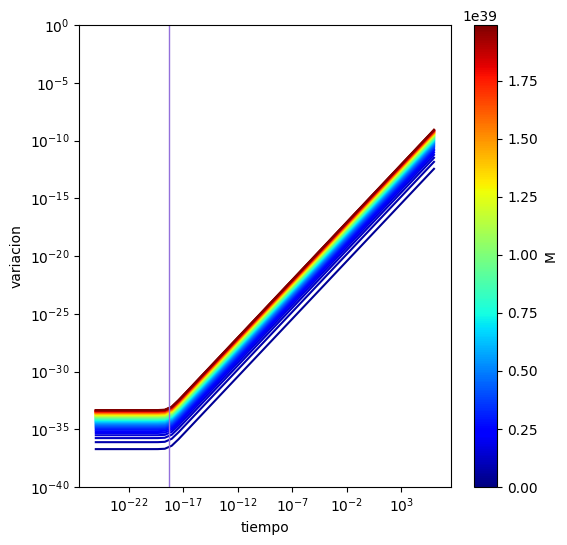

In [97]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(6, 6))


cmap = plt.get_cmap('jet')

n = 50

#cuentas auxiliares
w = 1/3  #radiacion 
aux = 1+3*w*c.value**2
A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)

norm = Normalize(vmin=10**(-13)*m_sol.value, vmax=(10**6)*m_sol.value)

for M in np.linspace(10**(-13)*m_sol.value, (10**6)*m_sol.value, n):
    t = np.logspace(-25, 6, n)
    rho = rho_0.value*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
    P = w*(c.value**2)*rho
    dot_M_ac = 4*pi*A*G.value**2*c.value**(-5)*M**2*(c.value**2*rho-P)
    
    ax.plot(t, dot_M_ac, c=cmap(norm(M)))
    
    
plt.xlabel('tiempo')
plt.ylabel('variacion')
plt.yscale('log')  
plt.xscale('log') 
plt.ylim(10**(-40), 1)
    
# Configura una barra de colores
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='M')

plt.axvline(x = T_b, color = 'mediumpurple', label = 'escala del bounce', lw=1)

plt.show()

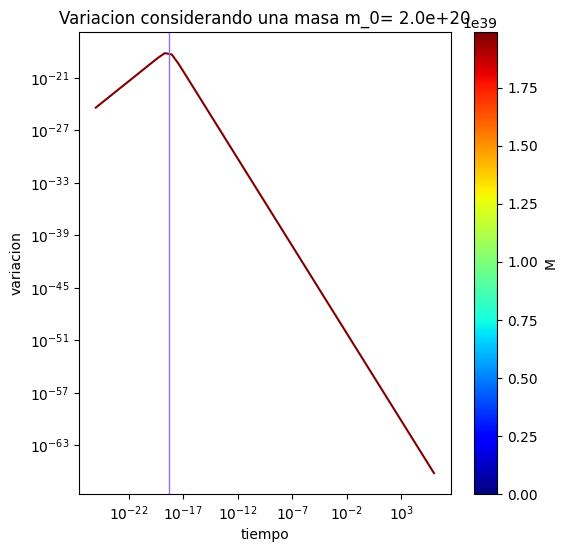

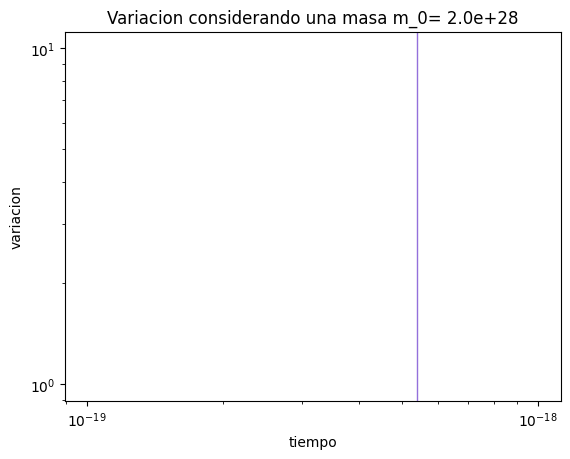

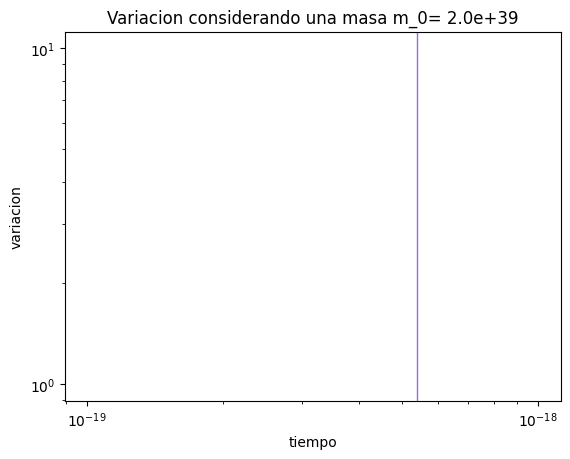

In [102]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(6, 6))


cmap = plt.get_cmap('jet')

n = 50


#cuentas auxiliares
w = 1/3  #radiacion 
aux = 1+3*w*c.value**2
A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)


masas = (10**(-13)*m_sol.value, m_sol.value*10**(-5), m_sol.value*10**6)

for m_0 in masas:
    norm = Normalize(m_0, vmax=(10**6)*m_sol.value)
    for M in np.linspace(m_0, (10**6)*m_sol.value, n):
        t = np.logspace(-25, 6, n)
        dot_M_b = m_0*((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w)))
 
    
    ax.plot(t, dot_M_b, c=cmap(norm(M)))
    
    
    plt.xlabel('tiempo')
    plt.ylabel('variacion')
    plt.yscale('log')  
    plt.xscale('log') 
    
    plt.title('Variacion considerando una masa m_0= {:.1e}'.format(m_0))
    
    # Configura una barra de colores
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='M')

    plt.axvline(x = T_b, color = 'mediumpurple', label = 'escala del bounce', lw=1)

    plt.show()

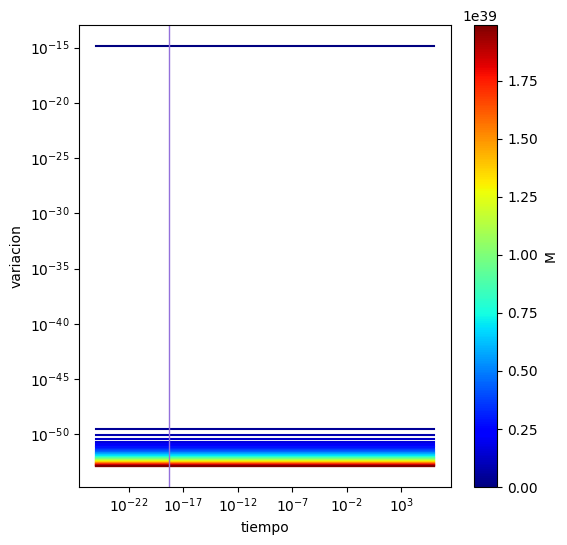

In [105]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors
from matplotlib.colors import Normalize

fig, ax = plt.subplots(figsize=(6, 6))


cmap = plt.get_cmap('jet')

n = 50

#cuentas auxiliares
w = 1/3  #radiacion 
aux = 1+3*w*c.value**2
A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)

norm = Normalize(vmin=10**(-13)*m_sol.value, vmax=(10**6)*m_sol.value)

for M in np.linspace(10**(-13)*m_sol.value, (10**6)*m_sol.value, n):
    t = np.logspace(-25, 6, n)
    A_M = (5.3*10**25)       # en unidades de g^3 s^-1
    dot_M_rh = (- A_M / M**2)* np.ones_like(t)
 
    ax.plot(t, -dot_M_rh, c=cmap(norm(M)))
    
    
plt.xlabel('tiempo')
plt.ylabel('variacion')
plt.yscale('log')  
plt.xscale('log') 
    
# Configura una barra de colores
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='M')

plt.axvline(x = T_b, color = 'mediumpurple', label = 'escala del bounce', lw=1)

plt.show()

In [33]:
import os
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
from matplotlib.collections import LineCollection

def multiline(xs, ys, c, ax=None, **kwargs):
    """Plot lines with different colorings

    Parameters
    ----------
    xs : iterable container of x coordinates
    ys : iterable container of y coordinates
    c : iterable container of numbers mapped to colormap
    ax (optional): Axes to plot on.
    kwargs (optional): passed to LineCollection

    Notes:
        len(xs) == len(ys) == len(c) is the number of line segments
        len(xs[i]) == len(ys[i]) is the number of points for each line (indexed by i)

    Returns
    -------
    lc : LineCollection instance.
    """

    # find axes
    ax = plt.gca() if ax is None else ax

    # create LineCollection
    segments = [np.column_stack([x, y]) for x, y in zip(xs, ys)]
    lc = LineCollection(segments, **kwargs)

    # set coloring of line segments
    #    Note: I get an error if I pass c as a list here... not sure why.
    lc.set_array(np.asarray(c))

    # add lines to axes and rescale 
    #    Note: adding a collection doesn't autoscalee xlim/ylim
    ax.add_collection(lc)
    ax.autoscale()
    return lc

Text(0.5, 1.0, 'Line Collection with mapped colors')

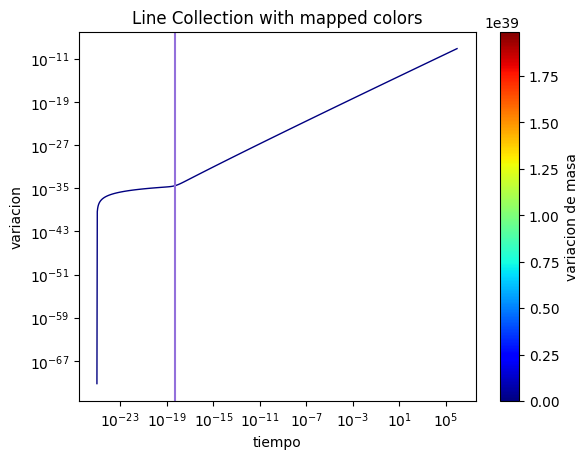

In [74]:
n = 1000

#cuentas auxiliares
w = 1/3  #radiacion 
aux = 1+3*w*c.value**2
A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)

#datos 
t = np.logspace(-25, 6, n) 
M = np.linspace(10**(-13)*m_sol.value, (10**6)*m_sol.value, n)
rho = rho_0.value*a_b*(1+(t/T_b)**2)**(1/(3-3*w))
P = w*(c.value**2)*rho
dot_M_ac = 4*pi*A*G.value**2*c.value**(-5)*M**2*(c.value**2*rho-P)

cmap = plt.get_cmap('jet')
colors = np.arange(n)

#plot
fig, ax = plt.subplots()
lc = multiline([t], [dot_M_ac], M, cmap=plt.get_cmap('jet'), lw=1)

plt.xlabel('tiempo')
plt.ylabel('variacion')
plt.yscale('log')  
plt.xscale('log') 

plt.axvline(x = T_b, color = 'mediumpurple', label = 'escala del bounce')

axcb = fig.colorbar(lc)
axcb.set_label('variacion de masa')
ax.set_title('Line Collection with mapped colors')


Text(0.5, 1.0, 'Line Collection with mapped colors')

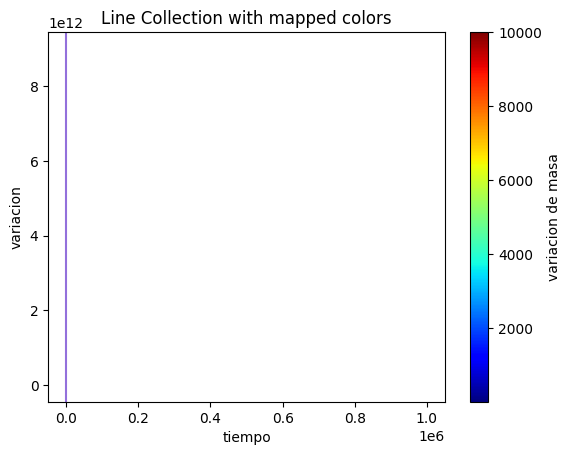

In [72]:
n = 1000

#cuentas auxiliares
w = 1/3  #radiacion 
aux = 1+3*w*c.value**2
A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)

#datos 
t = np.logspace(-2, 6, n) 
M = np.linspace(10, 10**4, n)
dot_M_ac = t**2+8*M**3

cmap = plt.get_cmap('jet')
colors = np.arange(n)

#plot
fig, ax = plt.subplots()
lc = multiline([t] [dot_M_ac], M, cmap=cmap, lw=1)

plt.xlabel('tiempo')
plt.ylabel('variacion')


plt.axvline(x = T_b, color = 'mediumpurple', label = 'escala del bounce')

axcb = fig.colorbar(lc)
axcb.set_label('variacion de masa')
ax.set_title('Line Collection with mapped colors')

Text(0.5, 1.0, 'Line Collection with mapped colors')

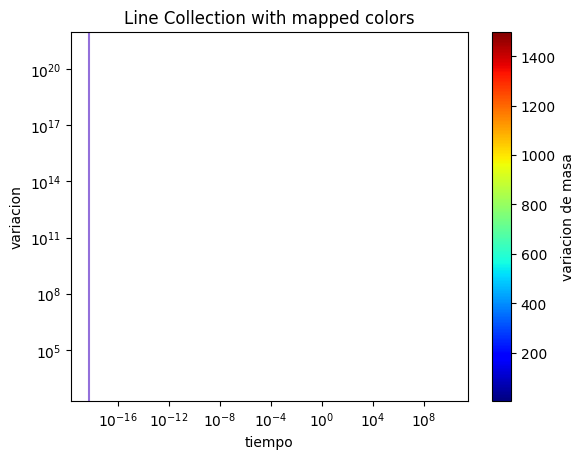

In [47]:
n = 10

#cuentas auxiliares
w = 1/3  #radiacion 
aux = 1+3*w*c.value**2
A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)

#datos 
t = np.logspace(1,10, n) 
M = np.linspace(4,1500, n)
dot_M_ac = 4*pi*t**2+4*pi*M**2


colors = np.arange(n)

#plot
fig, ax = plt.subplots()
lc = multiline(t, dot_M_ac, M, cmap='jet', lw=2)

plt.xlabel('tiempo')
plt.ylabel('variacion')
plt.yscale('log')  
plt.xscale('log') 

plt.axvline(x = T_b, color = 'mediumpurple', label = 'escala del bounce')

axcb = fig.colorbar(lc)
axcb.set_label('variacion de masa')
ax.set_title('Line Collection with mapped colors')

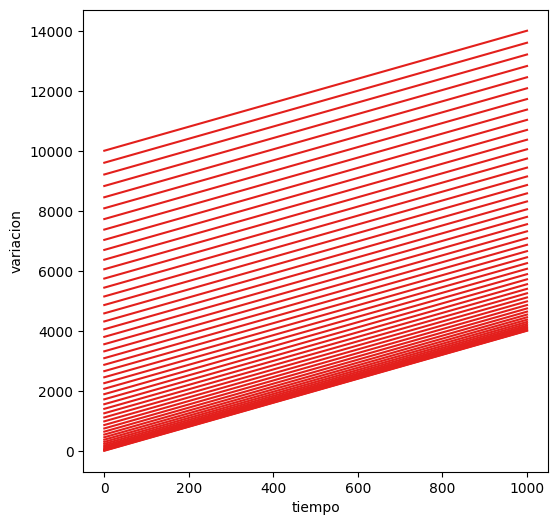

In [87]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib import colors

fig, ax = plt.subplots(figsize=(6, 6))



cmap = plt.get_cmap('jet')


n = 50

#cuentas auxiliares
w = 1/3  #radiacion 
aux = 1+3*w*c.value**2
A = (aux**(aux/(2*w*c.value**2)))/(4*w**(3/2)*c.value**3)


for M in np.linspace(1, 100, n):
    t = np.logspace(-1, 3, n)
    dot_M_ac = 4*t+M**2
    
    plt.xlabel('tiempo')
    plt.ylabel('variacion')
    
    ax.plot(t, dot_M_ac, c=cmap(M))

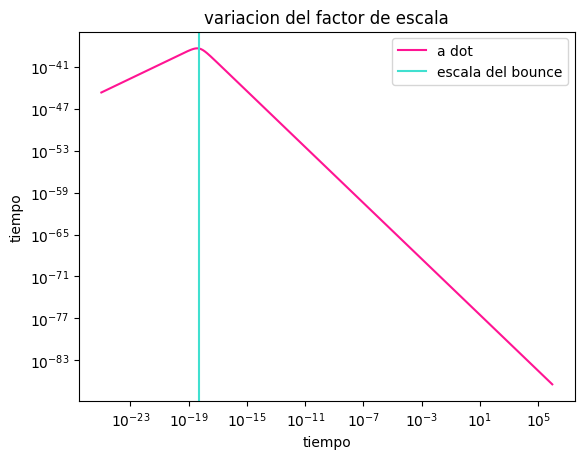

In [29]:
t = np.logspace(-25, 6, 1000, endpoint=False)

w = 1/3

a_dot = ((2*a_b*t)/(3*(1-w)*T_b))*(1+(t/T_b)**2)**((-2-3*w)/(3*(1-w))) 



plt.xlabel('tiempo')
plt.ylabel('tiempo')
plt.yscale('log')  
plt.xscale('log')

plt.plot(t, a_dot, label = "a dot", color='deeppink')
plt.axvline(x = T_b, color = 'turquoise', label = 'escala del bounce')
plt.legend()
plt.title('variacion del factor de escala')
plt.show()

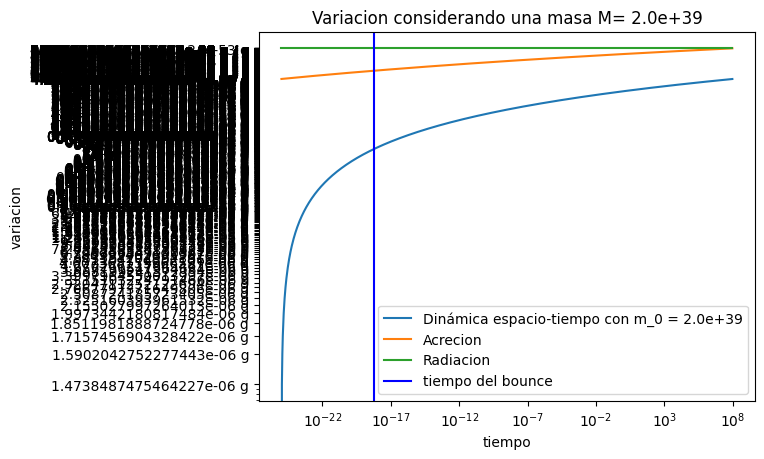

In [58]:
import pandas as pd

archivo = '33_variacion_masa.csv'

datos = pd.read_csv(archivo)

i = int(archivo[0])
j = int(archivo[1])

M = masas[i]
m_0 = masas[j]


t = datos['tiempo']
dot_M_b = datos['dot_M_b']
dot_M_ac = datos['dot_M_ac']
dot_M_rh = datos['dot_M_rh']

plt.xlabel('tiempo')
plt.ylabel('variacion')
plt.yscale('log')  
plt.xscale('log') 
plt.plot(t, dot_M_b, label = "Dinámica espacio-tiempo con m_0 = {:.1e}".format(m_0.value))
plt.plot(t, dot_M_ac, label = "Acrecion")
plt.plot(t, dot_M_rh, label = "Radiacion")
plt.axvline(x = T_b, color = 'b', label = 'tiempo del bounce')
plt.legend()
plt.title('Variacion considerando una masa M= {:.1e}'.format(M.value))
plt.show()

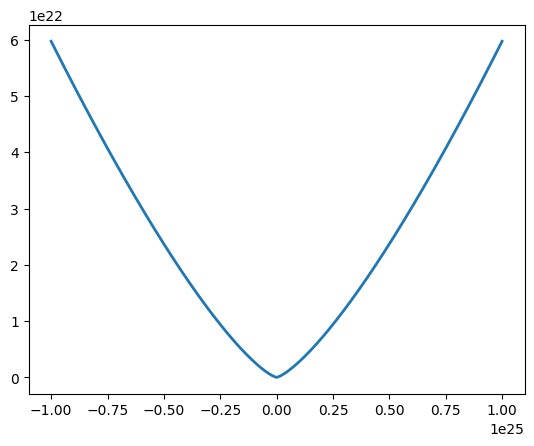

In [103]:
#en consecuencia el area del bh sera 

area_bh = (16*pi*G**2*(m_bh)**2)/c**2

# plot
fig, ax = plt.subplots()

ax.plot(t, area_bh, linewidth=2.0)

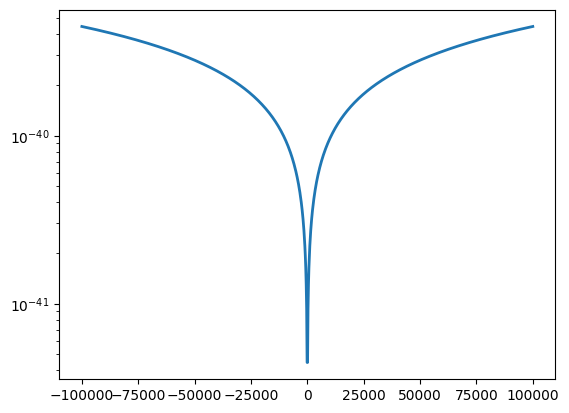

In [115]:
#calculo del ff!!

t = np.linspace(-10**5, 10**5, 1000)

m_b = m_0*a_b*(1+(t/T_b)**2)**(1/3)
m_rh = (A_M*t)/(M**2)
m_ac = (4*pi*A*G**2*c**(-3)*rho_0*M**2/t)*u.s

m_bh = m_b + m_rh - m_ac

area_bh = (16*pi*G**2*(m_bh)**2)/c**2

#defino la hip.sup 
R_0 = 2.75*10**28  #!!!! CAMBIAR    #este valor de R_0 es el valor con el que consideramos un universo PLANO en cm. lo saque de lo de fede lopez armengol 
area_hipsup = 4*pi*(R_0)**2*a_b*(1+(t/T_b)**2)**(1/3)


filling_factor = area_bh/area_hipsup


# plot
fig, ax = plt.subplots()
plt.yscale("log")

ax.plot(t, filling_factor, linewidth=2.0)


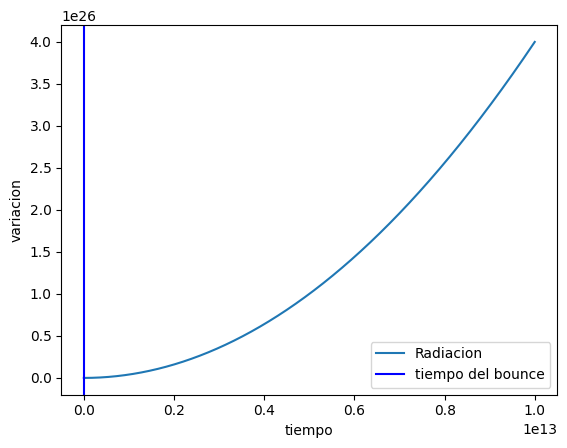

In [22]:
import matplotlib.pyplot as plt 
import numpy as np

t = np.logspace(-5, 13, 100000, endpoint=False) 
dot_M_rh = 4*t**2

plt.xlabel('tiempo')
plt.ylabel('variacion')
plt.plot(t, dot_M_rh, label = "Radiacion")
plt.axvline(x = T_b, color = 'b', label = 'tiempo del bounce')
plt.legend()
plt.show()

In [10]:
nombre = str(4)

type(nombre)

str